In [24]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [25]:
path = "https://query1.finance.yahoo.com/v7/finance/download/MNST?period1=1374451200&period2=1689984000&interval=1d&events=history&includeAdjustedClose=true"
dataset = pd.read_csv(path)
dataset["Date"]= pd.to_datetime(dataset["Date"], format="%Y-%m-%d")
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-07-22,10.660000,10.805000,10.630000,10.771667,10.771667,9570600
1,2013-07-23,10.768333,10.813333,10.648333,10.775000,10.775000,5768400
2,2013-07-24,10.775000,10.806667,10.398333,10.538333,10.538333,7774800
3,2013-07-25,10.493333,10.575000,10.426667,10.550000,10.550000,4194600
4,2013-07-26,10.446667,10.530000,10.331667,10.480000,10.480000,3279000
...,...,...,...,...,...,...,...
2513,2023-07-17,57.060001,57.840000,57.000000,57.290001,57.290001,4087900
2514,2023-07-18,57.270000,57.400002,56.000000,56.549999,56.549999,5032000
2515,2023-07-19,56.560001,57.470001,56.549999,57.250000,57.250000,4206300
2516,2023-07-20,57.209999,57.759998,57.080002,57.580002,57.580002,4900900


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2518 non-null   datetime64[ns]
 1   Open       2518 non-null   float64       
 2   High       2518 non-null   float64       
 3   Low        2518 non-null   float64       
 4   Close      2518 non-null   float64       
 5   Adj Close  2518 non-null   float64       
 6   Volume     2518 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.8 KB


In [27]:
dataset.shape

(2518, 7)

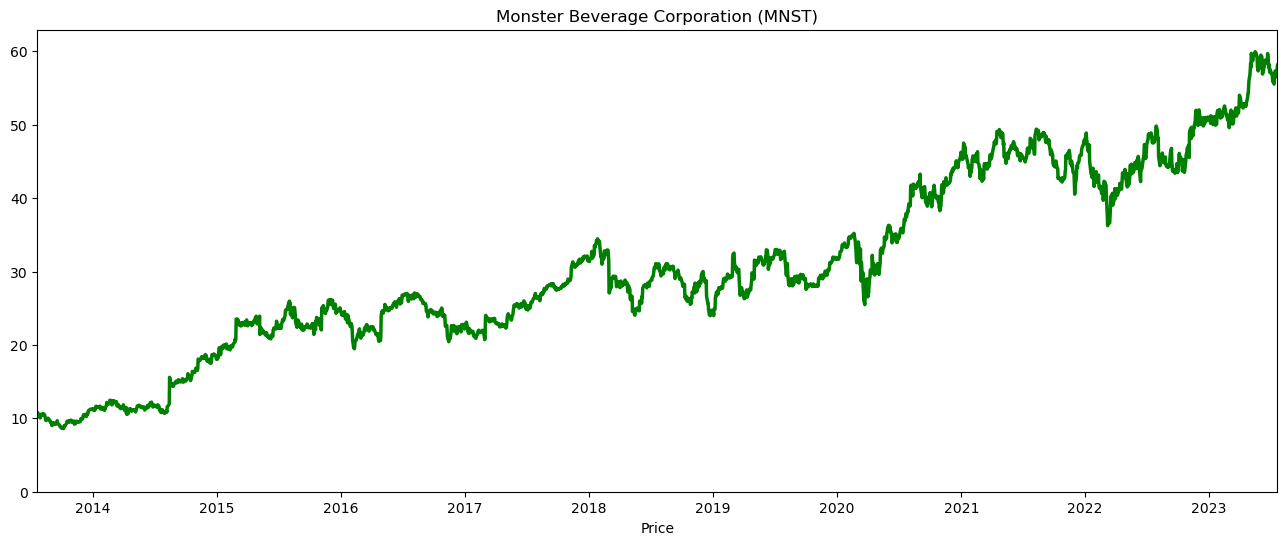

In [28]:
# Visualization of stock close price in time
plt.figure(figsize=(16,6))

plt.plot(dataset["Date"], dataset["Close"], color="green", linewidth=2.5)
plt.xlim(dataset["Date"].min(), dataset["Date"].max())
plt.ylim(0, dataset["Close"].max()*1.05)
plt.xlabel("Date")
plt.xlabel("Price")
plt.title("Monster Beverage Corporation (MNST)")

plt.show()

In [29]:
# Converstion of dataFrame to np array with Close price
data_array = dataset[["Close"]].values.copy()
data_array

array([[10.771667],
       [10.775   ],
       [10.538333],
       ...,
       [57.25    ],
       [57.580002],
       [58.099998]])

In [30]:
train_size = 0.9

train_data_size = math.ceil(dataset.shape[0] * train_size)
train_data_size

2267

In [31]:
# scaling close price

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_array = scaler.fit_transform(data_array)

scaled_data_array

array([[0.04214424],
       [0.04220917],
       [0.03759862],
       ...,
       [0.94759572],
       [0.95402454],
       [0.96415466]])

In [32]:
# Creatin train dataset
train_data = scaled_data_array[:train_data_size,:].copy()
train_data

array([[0.04214424],
       [0.04220917],
       [0.03759862],
       ...,
       [0.76992763],
       [0.77129131],
       [0.76515469]])

In [33]:
# X and y variables for train dataset
X_train = []
y_train = []

for i in range(20, len(train_data)):
    X_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 21:
        print(i)
        print(X_train[i-20])
        print(y_train[i-20])
        print()

20
[0.04214424 0.04220917 0.03759862 0.03782591 0.03646223 0.02909187
 0.02798793 0.03032567 0.03529336 0.0380532  0.03828046 0.03678692
 0.03509855 0.03837787 0.03912466 0.03607261 0.03295562 0.02896199
 0.02250073 0.02139681]
0.024221578937258736

21
[0.04220917 0.03759862 0.03782591 0.03646223 0.02909187 0.02798793
 0.03032567 0.03529336 0.0380532  0.03828046 0.03678692 0.03509855
 0.03837787 0.03912466 0.03607261 0.03295562 0.02896199 0.02250073
 0.02139681 0.02422158]
0.02464365758165729



In [34]:
# Transform X_train and y_train in to np array
X_train_array, y_train_array = np.array(X_train), np.array(y_train)

In [35]:
y_train_array

array([0.02422158, 0.02464366, 0.02383196, ..., 0.76992763, 0.77129131,
       0.76515469])

In [36]:
X_train_array

array([[0.04214424, 0.04220917, 0.03759862, ..., 0.02896199, 0.02250073,
        0.02139681],
       [0.04220917, 0.03759862, 0.03782591, ..., 0.02250073, 0.02139681,
        0.02422158],
       [0.03759862, 0.03782591, 0.03646223, ..., 0.02139681, 0.02422158,
        0.02464366],
       ...,
       [0.69063934, 0.71713365, 0.71615961, ..., 0.78444107, 0.77859674,
        0.75784926],
       [0.71713365, 0.71615961, 0.73018606, ..., 0.77859674, 0.75784926,
        0.76992763],
       [0.71615961, 0.73018606, 0.75356346, ..., 0.75784926, 0.76992763,
        0.77129131]])

In [37]:
X_train_array.shape

(2247, 20)

In [38]:
# Changing shape of frame
X_train_array = np.reshape(X_train_array, (X_train_array.shape[0], X_train_array.shape[1],1))

from pprint import pprint
pprint(X_train_array[:2])
print("\n", X_train_array.shape)


array([[[0.04214424],
        [0.04220917],
        [0.03759862],
        [0.03782591],
        [0.03646223],
        [0.02909187],
        [0.02798793],
        [0.03032567],
        [0.03529336],
        [0.0380532 ],
        [0.03828046],
        [0.03678692],
        [0.03509855],
        [0.03837787],
        [0.03912466],
        [0.03607261],
        [0.03295562],
        [0.02896199],
        [0.02250073],
        [0.02139681]],

       [[0.04220917],
        [0.03759862],
        [0.03782591],
        [0.03646223],
        [0.02909187],
        [0.02798793],
        [0.03032567],
        [0.03529336],
        [0.0380532 ],
        [0.03828046],
        [0.03678692],
        [0.03509855],
        [0.03837787],
        [0.03912466],
        [0.03607261],
        [0.03295562],
        [0.02896199],
        [0.02250073],
        [0.02139681],
        [0.02422158]]])

 (2247, 20, 1)


In [39]:
model_01 = Sequential()
model_01.add(LSTM(40, return_sequences=True, input_shape=(X_train_array.shape[1], 1)))
model_01.add(LSTM(40))
model_01.add(Dense(20, activation = "relu"))
model_01.add(Dense(1))

model_01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 40)            6720      
                                                                 
 lstm_1 (LSTM)               (None, 40)                12960     
                                                                 
 dense (Dense)               (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 20,521
Trainable params: 20,521
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_01.compile(optimizer="adam", loss="mean_squared_error")
history_1 = model_01.fit(X_train_array, y_train_array, batch_size=32, epochs=10, validation_split=0.2, shuffle=False)

Epoch 1/10
57/57 [==============================] - 9s 51ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 2/10
57/57 [==============================] - 1s 26ms/step - loss: 0.0058 - val_loss: 7.5516e-04
Epoch 3/10
57/57 [==============================] - 1s 26ms/step - loss: 5.7145e-04 - val_loss: 7.3328e-04
Epoch 4/10
57/57 [==============================] - 1s 26ms/step - loss: 6.3488e-04 - val_loss: 8.2862e-04
Epoch 5/10
57/57 [==============================] - 2s 26ms/step - loss: 5.2832e-04 - val_loss: 8.1770e-04
Epoch 6/10
57/57 [==============================] - 1s 26ms/step - loss: 4.2786e-04 - val_loss: 7.8616e-04
Epoch 7/10
57/57 [==============================] - 1s 26ms/step - loss: 4.3311e-04 - val_loss: 7.2099e-04
Epoch 8/10
57/57 [==============================] - 1s 26ms/step - loss: 4.1995e-04 - val_loss: 7.5951e-04
Epoch 9/10
57/57 [==============================] - 1s 26ms/step - loss: 4.8120e-04 - val_loss: 6.0009e-04
Epoch 10/10
57/57 [==============================

In [41]:
# X and y for test dataset
test_data_scaled = scaled_data_array[train_data_size-20:, :]
test_data = data_array[train_data_size-20:, :]

X_test = []
y_test = []

for i in range(20, len(test_data_scaled)):
    X_test.append(test_data_scaled[i-20:i, 0])
    y_test.append(test_data[i, 0])
    if i <= 20:
        print(X_test)
        print(y_test)
        print()

X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

[array([0.73018606, 0.75356346, 0.74995943, 0.71684145, 0.74158252,
       0.73525112, 0.75366081, 0.76846653, 0.78093446, 0.77703821,
       0.78181115, 0.77577196, 0.77470049, 0.77518756, 0.78444107,
       0.77859674, 0.75784926, 0.76992763, 0.77129131, 0.76515469])]
[47.535]



In [42]:
X_test.shape

(251, 20, 1)

In [43]:
forecast_test = model_01.predict(X_test, batch_size=32)
forecast_test = scaler.inverse_transform(forecast_test)
forecast_test[-10:]

8/8 [==============================] - 1s 8ms/step


array([[54.94648 ],
       [54.795364],
       [54.61515 ],
       [54.481094],
       [54.41345 ],
       [54.422432],
       [54.470547],
       [54.491   ],
       [54.54271 ],
       [54.62439 ]], dtype=float32)

In [44]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, forecast_test)

0.027851020240797414

In [45]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, forecast_test)

1.4662245022342273

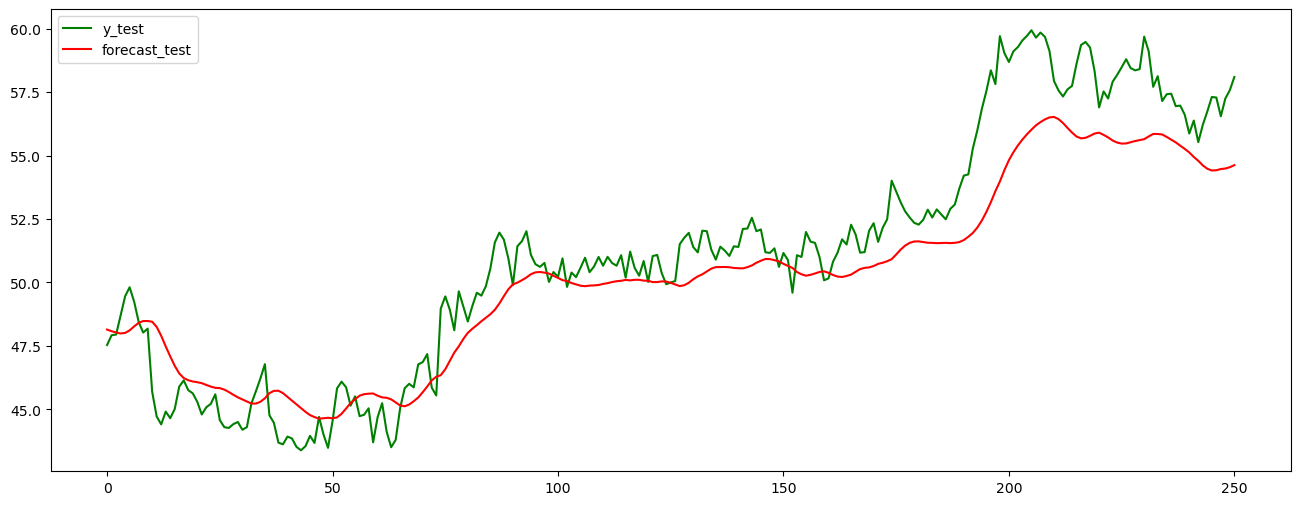

In [47]:
plt.figure(figsize=(16,6))
plt.plot(y_test, color="green")
plt.plot(forecast_test, color="red")
plt.legend(["y_test", "forecast_test"])